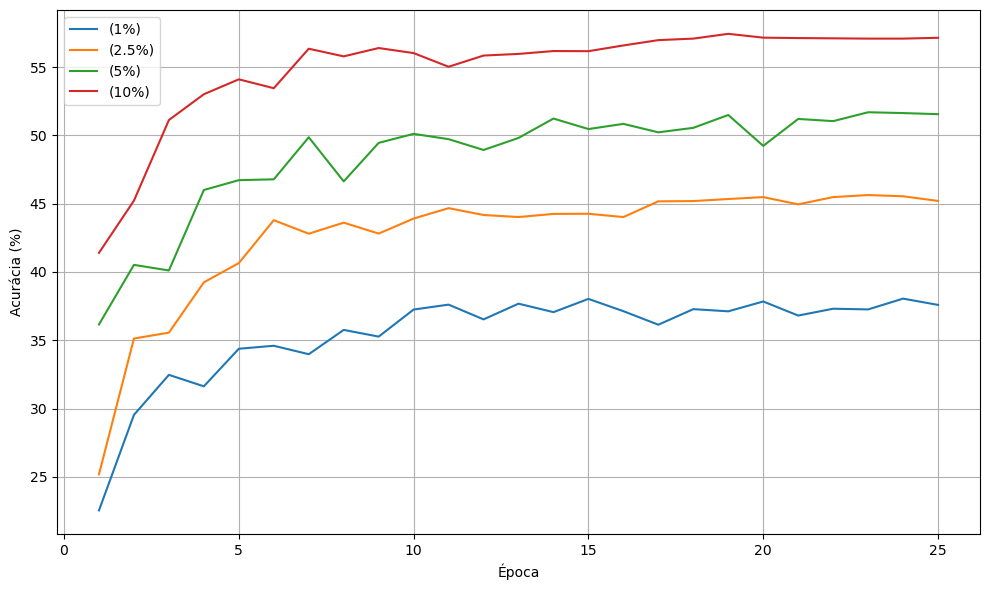

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário com os caminhos dos arquivos CSV e suas respectivas legendas
files = {
    "1%": "metricas_por_epoca_completo_1pct.csv",
    "2.5%": "metricas_por_epoca_completo_2.5pct.csv",
    "5%": "metricas_por_epoca_completo_5pct.csv",
    "10%": "metricas_por_epoca_completo_10pct.csv"
}

plt.figure(figsize=(10, 6))

# Lê e plota os dados de cada fração do dataset
for label, path in files.items():
    df = pd.read_csv(path)
    df_base = df[df["Tecnica"] == "Sem Aug"]
    plt.plot(df_base["Epoca"], df_base["Acuracia"], label=f"({label})")

#plt.title("Evolução da Acurácia por Época do Modelo Base")
plt.xlabel("Época")
plt.ylabel("Acurácia (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("grafico_sem_aug_por_epoca.png", dpi=300)
plt.show()

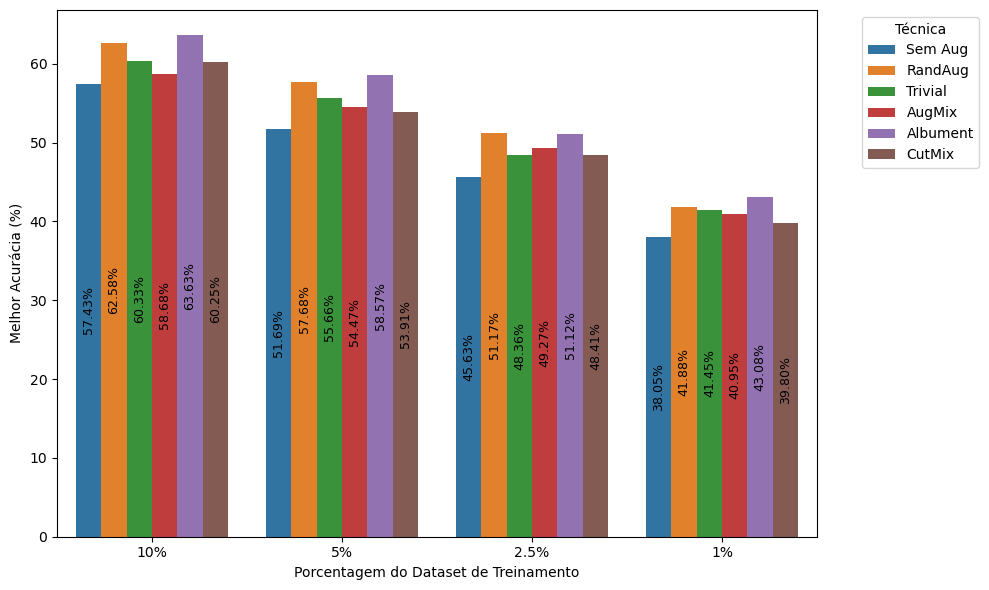

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os arquivos de resumo
paths = {
    "10%": "summary_all_10pct.csv",
    "5%": "summary_all_5pct.csv",
    "2.5%": "summary_all_2.5pct.csv",
    "1%": "summary_all_1pct.csv"
}

# Junta os dados
df_all = []
for pct, path in paths.items():
    df = pd.read_csv(path)
    df["Cenário"] = pct
    df_all.append(df)

df_summary = pd.concat(df_all, ignore_index=True)

# Define as técnicas isoladas
tecnicas_isoladas = ["Sem Aug", "RandAug", "Trivial", "AugMix", "Albument", "CutMix"]
df_iso = df_summary[df_summary["Tecnica"].isin(tecnicas_isoladas)]

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_iso, x="Cenário", y="Melhor_acc", hue="Tecnica")
#plt.title("Melhor Acurácia por Técnica Isolada em Cada Cenário")
plt.ylabel("Melhor Acurácia (%)")
plt.xlabel("Porcentagem do Dataset de Treinamento")
plt.legend(title="Técnica", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adiciona os valores dentro das barras, com texto branco
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{height:.2f}%',
                    xy=(p.get_x() + p.get_width() / 2, height / 2),
                    ha='center', va='center', fontsize=9, rotation=90)

plt.tight_layout()
plt.savefig("grafico_tecnicas_por_cenario_dentro_barras.png", dpi=300)
plt.show()

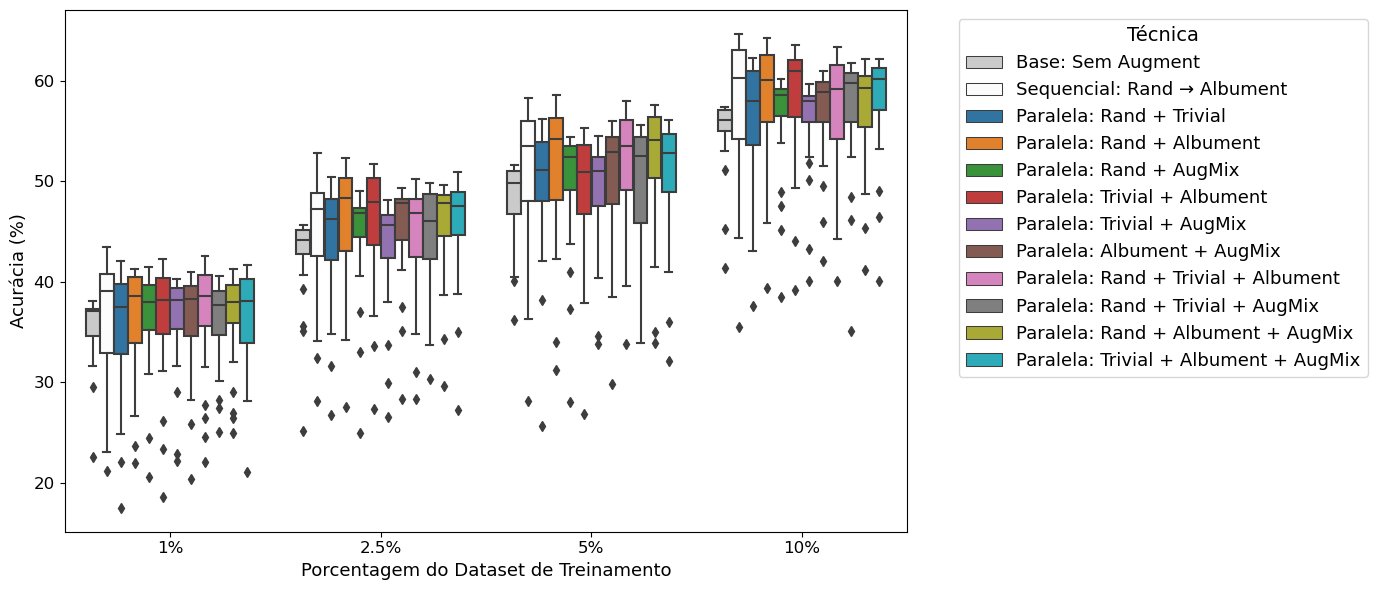

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caminhos dos arquivos de métricas por época
paths = {
    "1%": "metricas_por_epoca_completo_1pct.csv",
    "2.5%": "metricas_por_epoca_completo_2.5pct.csv",
    "5%": "metricas_por_epoca_completo_5pct.csv",
    "10%": "metricas_por_epoca_completo_10pct.csv"
}

# Técnicas de interesse: paralelas (metades/terços), sequencial e sem aumento
tecnicas_desejadas = [
    "Rand+Trivial (metades)",
    "Rand+Albument (metades)",
    "Rand+AugMix (metades)",
    "Trivial+Albument (metades)",
    "Trivial+AugMix (metades)",
    "Albument+AugMix (metades)",
    "Rand+Trivial+Albument (terços)",
    "Rand+Trivial+AugMix (terços)",
    "Rand+Albument+AugMix (terços)",
    "Trivial+Albument+AugMix (terços)",
    "Rand->Albument",
    "Sem Aug"
]

# Nomes legíveis para legenda
nome_legenda = {
    "Sem Aug": "Base: Sem Augment",
    "Rand->Albument": "Sequencial: Rand → Albument",
    "Rand+Albument (metades)": "Paralela: Rand + Albument",
    "Rand+Trivial (metades)": "Paralela: Rand + Trivial",
    "Rand+AugMix (metades)": "Paralela: Rand + AugMix",
    "Trivial+Albument (metades)": "Paralela: Trivial + Albument",
    "Trivial+AugMix (metades)": "Paralela: Trivial + AugMix",
    "Albument+AugMix (metades)": "Paralela: Albument + AugMix",
    "Rand+Trivial+Albument (terços)": "Paralela: Rand + Trivial + Albument",
    "Rand+Trivial+AugMix (terços)": "Paralela: Rand + Trivial + AugMix",
    "Rand+Albument+AugMix (terços)": "Paralela: Rand + Albument + AugMix",
    "Trivial+Albument+AugMix (terços)": "Paralela: Trivial + Albument + AugMix",
}

# Paleta de cores personalizada
custom_palette = {
    "Paralela: Rand + Trivial": "#1f77b4",
    "Paralela: Rand + Albument": "#ff7f0e",
    "Paralela: Rand + AugMix": "#2ca02c",
    "Paralela: Trivial + Albument": "#d62728",
    "Paralela: Trivial + AugMix": "#9467bd",
    "Paralela: Albument + AugMix": "#8c564b",
    "Paralela: Rand + Trivial + Albument": "#e377c2",
    "Paralela: Rand + Trivial + AugMix": "#7f7f7f",
    "Paralela: Rand + Albument + AugMix": "#bcbd22",
    "Paralela: Trivial + Albument + AugMix": "#17becf",
    "Sequencial: Rand → Albument": "#fcfcfc",
    "Base: Sem Augment": "#cacaca"
}

# Carrega os dados
df_list = []
for pct, path in paths.items():
    df = pd.read_csv(path)
    df["Cenário"] = pct
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

# Filtra e renomeia
df_plot = df[df["Tecnica"].isin(tecnicas_desejadas)].copy()
df_plot["Tecnica"] = df_plot["Tecnica"].map(nome_legenda)

# Gráfico
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_plot, x="Cenário", y="Acuracia", hue="Tecnica", palette=custom_palette)
#plt.title("Estabilidade da Acurácia por Época: Combinações Paralelas vs Outras Estratégias")
plt.xlabel("Porcentagem do Dataset de Treinamento", fontsize=13)
plt.ylabel("Acurácia (%)", fontsize=13)
plt.legend(title="Técnica", bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=14, fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

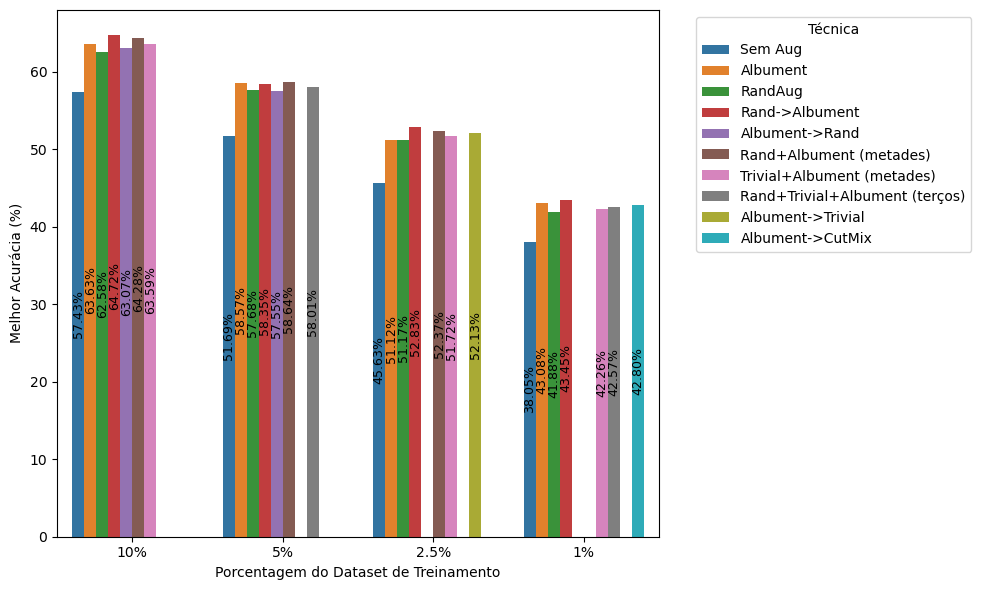

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os arquivos de resumo
paths = {
    "10%": "summary_all_10pct.csv",
    "5%": "summary_all_5pct.csv",
    "2.5%": "summary_all_2.5pct.csv",
    "1%": "summary_all_1pct.csv"
}

# Técnicas base para classificação
tecnicas_isoladas = ["Sem Aug", "RandAug", "Trivial", "AugMix", "Albument", "CutMix"]

# Agrupa os dados
df_all = []
for pct, path in paths.items():
    df = pd.read_csv(path)
    df["Cenário"] = pct
    
    # Seleciona o modelo base
    base = df[df["Tecnica"] == "Sem Aug"]
    
    # Melhores 2 técnicas isoladas (sem contar "Sem Aug")
    isoladas = df[df["Tecnica"].isin(tecnicas_isoladas) & (df["Tecnica"] != "Sem Aug")]
    top_isoladas = isoladas.nlargest(2, "Melhor_acc")
    
    # Melhores 2 sequenciais (exclui isoladas e paralelas)
    df_seq = df[~df["Tecnica"].isin(tecnicas_isoladas) & ~df["Tecnica"].str.contains("[(+)]", regex=True)]
    top_seq = df_seq.nlargest(2, "Melhor_acc")
    
    # Melhores 2 paralelas (com "+" no nome)
    df_paralelas = df[df["Tecnica"].str.contains(r"\+")]
    top_paralelas = df_paralelas.nlargest(2, "Melhor_acc")
    
    # Junta todos
    df_sel = pd.concat([base, top_isoladas, top_seq, top_paralelas])
    df_all.append(df_sel)

# Concatena todos os cenários
df_final = pd.concat(df_all, ignore_index=True)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_final, x="Cenário", y="Melhor_acc", hue="Tecnica")
plt.ylabel("Melhor Acurácia (%)")
plt.xlabel("Porcentagem do Dataset de Treinamento")
plt.legend(title="Técnica", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adiciona os valores dentro das barras
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{height:.2f}%',
                    xy=(p.get_x() + p.get_width() / 2, height / 2),
                    ha='center', va='center', fontsize=9, rotation=90)

plt.tight_layout()
plt.savefig("grafico_comparacao_melhores_por_estrategia.png", dpi=300)
plt.show()

In [32]:
import pandas as pd

# Caminhos para os arquivos
paths = {
    "10%": "summary_all_10pct.csv",
    "5%": "summary_all_5pct.csv",
    "2.5%": "summary_all_2.5pct.csv",
    "1%": "summary_all_1pct.csv"
}

# Técnicas isoladas conhecidas
tecnicas_isoladas = ["Sem Aug", "RandAug", "Trivial", "AugMix", "Albument", "CutMix"]

# Lista para guardar os resultados
resultados = []

for pct, path in paths.items():
    df = pd.read_csv(path)
    df["Cenário"] = pct

    # Modelo base
    base = df[df["Tecnica"] == "Sem Aug"]

    # Melhores 2 isoladas (sem contar "Sem Aug")
    isoladas = df[df["Tecnica"].isin(tecnicas_isoladas) & (df["Tecnica"] != "Sem Aug")]
    top_isoladas = isoladas.nlargest(2, "Melhor_acc")

    # Melhores 2 sequenciais: não isoladas e sem "+"
    sequenciais = df[~df["Tecnica"].isin(tecnicas_isoladas) & ~df["Tecnica"].str.contains(r"\+")]
    top_sequenciais = sequenciais.nlargest(2, "Melhor_acc")

    # Melhores 2 paralelas: têm "+"
    paralelas = df[df["Tecnica"].str.contains(r"\+")]
    top_paralelas = paralelas.nlargest(2, "Melhor_acc")

    # Concatena tudo
    selecao = pd.concat([base, top_isoladas, top_sequenciais, top_paralelas])
    resultados.append(selecao)

# Junta tudo em um único DataFrame
df_final = pd.concat(resultados, ignore_index=True)

# Reorganiza colunas se necessário
colunas_ordem = ["Cenário", "Tecnica", "Melhor_acc", "Media_acc", "Desvio", "Tempo_total(s)"]
df_final = df_final[colunas_ordem]

# Salva como CSV
df_final.to_csv("comparacao_melhores_por_estrategia.csv", index=False)
print("CSV gerado: comparacao_melhores_por_estrategia.csv")

CSV gerado: comparacao_melhores_por_estrategia.csv
